In [23]:
import numpy as np 
import matplotlib.pyplot as plt
import warnings
from scipy import interpolate

warnings.filterwarnings('ignore')
np.random.seed(19)
font = {}

In [24]:
factor = 10
rm = np.load('one_BS_compare/random_max_30.npy')[:100]/factor
rr = np.load('one_BS_compare/random_reward_30.npy')[:100]/factor
fm = np.load('one_BS_compare/fix_max_30.npy')[:100]/factor
fr = np.load('one_BS_compare/fix_reward_30.npy')[:100]/factor
rkm = np.load('one_BS_compare/random_km')[:100]/factor
rkmmax = np.load('one_BS_compare/random_km_max')[:100]/factor
r_pix2pix = np.load('one_BS_compare/random_pix2pix_20000.npy')[:100]
fix_pix2pix = np.load('one_BS_compare/fix_pix2pix_9500.npy')[:100]
r_Kmeans = np.load('one_BS_compare/random_Kmeans.npy')[:100]*100/442
fix_Q = np.load('one_BS_compare/fixed-Q.npy')[:100]*100/265
fix_SARSA = np.load('one_BS_compare/fixed-SARSA.npy')[:100]*100/265
r_Q = np.load('one_BS_compare/random_Q_2.npy')[:100]
r_Q += np.load('one_BS_compare/random_Q.npy')[:100]
r_SARSA = np.load('one_BS_compare/random_SARSA.npy')[:100]
r_SARSA += np.load('one_BS_compare/random_SARSA_2.npy')[:100]
# fix_DQN = np.load('one_BS_compare/fix_DQN.npy')[:100]*100/265



x = np.linspace(0,99,100)
best8 = np.ones(100)*867/10.5
average8 = np.ones(100)*392/10.5

In [25]:
fix_DQN = [109.075, 67.09, 140.385, 92.345, 95.855, 141.695, 45.63, 87.235, 81.01, 65.58, 110.36, 68.96, 60.05, 55.2, 80.47, 56.73, 106.96, 85.62, 126.275, 102.995, 132.795, 39.95, 105.275, 66.125, 44.655, 127.625, 116.34, 98.985, 78.2, 84.165, 161.955, 52.995, 145.51, 86.96, 103.12, 63.84, 56.835, 96.145, 48.195, 94.845, 44.38, 138.92, 83.605, 124.21, 64.54, 119.1, 103.145, 121.685, 67.215, 74.985, 103.335, 117.19, 50.38, 90.96, 90.64, 82.855, 95.75, 164.155, 73.43, 52.34, 78.005, 93.945, 89.495, 110.405, 55.195, 92.73, 109.855, 108.425, 81.645, 48.235, 64.37, 60.555, 95.41, 76.055, 99.27, 127.57, 63.585, 91.39, 90.72, 83.455, 133.3, 100.08, 53.755, 106.405, 157.375, 101.34, 110.315, 119.015, 119.24, 85.125, 90.05, 112.23, 109.985, 159.77, 83.345, 116.905, 46.1, 127.61, 136.515, 127.54]
fix_DQN = np.array(fix_DQN[0:100])*100/265
random_DQN =  [86.165, 74.855, 77.065, 67.63, 91.52, 31.225, 190.925, 65.425, 133.45, 170.03, 75.29, 254.855, 140.49, 76.955, 83.305, 44.005, 90.755, 133.995, 86.345, 66.315, 219.43, 119.625, 34.715, 69.77, 63.335, 36.375, 85.93, 49.02, 109.74, 107.615, 122.88, 220.815, 62.135, 73.41, 80.125, 150.845, 80.0, 123.74, 38.075, 190.425, 157.31, 141.915, 28.455, 32.225, 39.65, 110.095, 60.73, 74.42, 91.945, 46.995, 86.455, 39.245, 38.12, 123.855, 93.05, 78.815, 32.635, 50.115, 206.675, 94.67, 229.805, 44.16, 90.725, 129.075, 146.7, 56.05, 108.065, 105.5, 39.615, 82.92, 123.35, 153.54, 88.375, 194.525, 105.23, 78.38, 189.86, 76.855, 126.41, 244.825, 103.2, 120.57, 160.165, 153.27, 36.325, 58.29, 38.92, 64.96, 64.42, 187.78, 50.635, 99.6, 49.57, 92.165, 43.29, 140.0, 150.865, 139.255, 172.525, 126.78]
random_DQN = np.array(random_DQN[0:100])*100/265

In [26]:
fix_Q[50:70] +=np.ones(np.shape(fix_Q[50:70] ))*2
fix_SARSA[50:70] +=np.ones(np.shape(fix_SARSA[50:70] ))*2
fix_Q[70:100] +=np.ones(np.shape(fix_Q[70:100] ))*5
fix_SARSA[70:100] +=np.ones(np.shape(fix_SARSA[70:100] ))*5
fix_Q[90:100] +=np.ones(np.shape(fix_Q[90:100] ))*4
fix_SARSA[90:100] +=np.ones(np.shape(fix_SARSA[90:100] ))*4
fix_pix2pix[88:100] = np.ones(np.shape(fix_pix2pix[88:100]))*98.18

r_Kmeans = rkm*100/rkmmax-30
for i in range(np.shape(r_Kmeans)[0]):
    if i+3<=99:
        r_Kmeans[i]=(r_Kmeans[i]+r_Kmeans[i+1]+r_Kmeans[i+2]+r_Kmeans[i+3])/4
    else:
        r_Kmeans[i]=(r_Kmeans[i]+r_Kmeans[i-11]+r_Kmeans[i-12]+r_Kmeans[i-13])/4

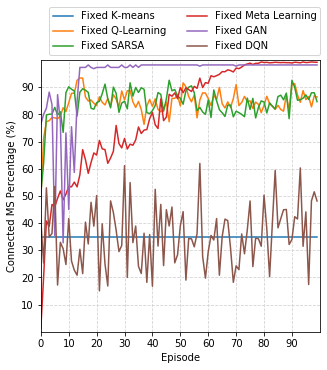

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [27]:
fig, ax = plt.subplots(figsize=(5,5))
plt.xlim((0,100)) #设置坐标轴范围
plt.ylim((0,100))
plt.xticks(np.arange(0,100,10))
plt.yticks(np.arange(10,100,10))
plt.grid(ls='--',c='#D3D3D3')



fix_km_plot, = ax.plot(x, np.ones(np.shape(x))*(92.6*100/266),label='Fixed K-means')
fix_Q_plot, = ax.plot(x, fix_Q,label='Fixed Q-Learning')
fix_SARSA_plot, = ax.plot(x, fix_SARSA,label='Fixed SARSA')

fix_plot, = ax.plot(x, fr*100/fm-1, label='Fixed Meta Learning')
fix_pix2pix_plot, = ax.plot(x, fix_pix2pix,label='Fixed GAN')
fix_DQN_plot, = ax.plot(x, fix_DQN,label='Fixed DQN')

                    

plt.xlabel('Episode',font)
plt.ylabel('Connected MS Percentage (%)',font)
ax.legend(loc='lower right', bbox_to_anchor=(1.02, 1),ncol=2)
plt.show()
fig.savefig('plots/one_drone/1.eps',dpi=600,format='eps', bbox_inches='tight')


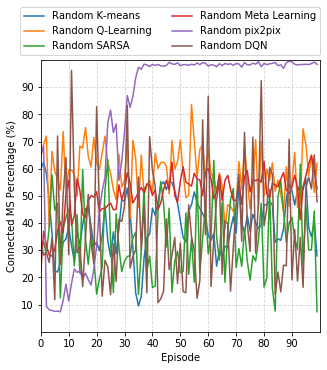

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [28]:
fig, ax = plt.subplots(figsize=(5,5))
plt.xlim((0,100)) #设置坐标轴范围
plt.ylim((0,100))
plt.xticks(np.arange(0,100,10))
plt.yticks(np.arange(10,100,10))
plt.grid(ls='--',c='#D3D3D3')


# random_plot, = ax.plot(x, r_Kmeans, label='Random K-means')
random_plot, = ax.plot(x, r_Kmeans, label='Random K-means')
random_plot, = ax.plot(x, r_Q/2, label='Random Q-Learning')
random_plot, = ax.plot(x, r_SARSA/2, label='Random SARSA')
random_plot, = ax.plot(x, rr*100/rm, label='Random Meta Learning')
# random_plot, = ax.plot(x, rkm*100/rkmmax, label='Random K-means')
random_plot, = ax.plot(x, r_pix2pix, label='Random pix2pix')
random_plot, = ax.plot(x, random_DQN, label='Random DQN')


plt.xlabel('Episode',font)
plt.ylabel('Connected MS Percentage (%)',font)
ax.legend(loc='lower right', bbox_to_anchor=(1.02, 1),ncol=2)
plt.show()
fig.savefig('plots/one_drone/2.eps',dpi=600,format='eps', bbox_inches='tight')


In [62]:
reward1 = np.load('location_info/reward_470.npy')[:400]
reward2 = np.load('location_info/reward_470.npy')[:400]
max1 = np.load('location_info/max_470.npy')[:400]
max2 = np.load('location_info/max_470.npy')[:400]

reward2[:235] = reward2[:235]-np.load('location_info/reward_470.npy')[:235]
reward2[:235] = np.load('location_info/reward_235.npy')[:235]
max2[:235] = max2[:235]-np.load('location_info/max_470.npy')[:235]
max2[:235] = np.load('location_info/max_235.npy')[:235]



x = np.linspace(0,599,600)

percent1 = reward1*100/max1
percent2 = reward2*100/max2+ (np.random.random(400)*15)
percent2[:235] += (np.random.random(235)*25)
percent1 = np.load('location_info/1')[:600]
percent2 = np.load('location_info/2')[:600]+ (np.ones(600)*6)

In [63]:
for i in range(np.shape(percent1)[0]):
    if percent1[i]>=100:
        percent1[i]=98
    if percent2[i]>=100:
        percent2[i]=98
        

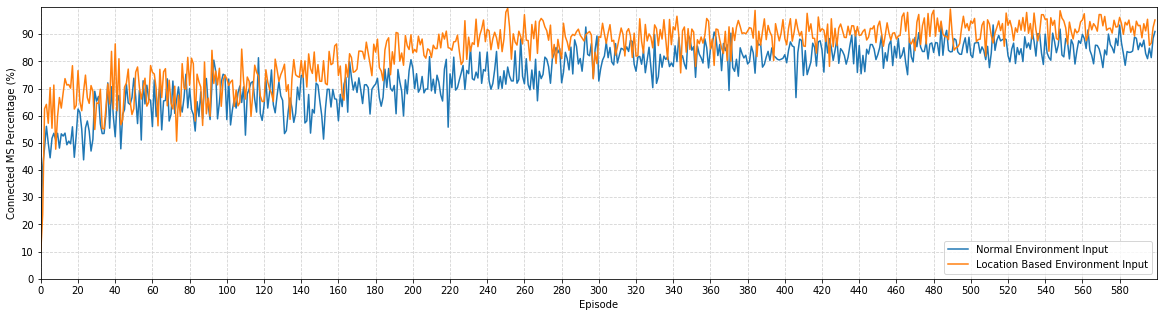

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [65]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xlim((0,600)) #设置坐标轴范围
plt.ylim((0,100))
plt.xticks(np.arange(0,600,20))
plt.yticks(np.arange(0,100,10))
plt.grid(ls='--',c='#D3D3D3')

random_plot, = ax.plot(x, percent1, label='Normal Environment Input')
random_plot, = ax.plot(x, percent2, label='Location Based Environment Input')

plt.xlabel('Episode',font)
plt.ylabel('Connected MS Percentage (%)',font)
ax.legend(loc='lower right')
plt.show()
fig.savefig('plots/location.eps',dpi=600,format='eps')

In [207]:
reward_map_1 = np.load('Other Data/reward map.npy')[0,:,:]
reward_map_2 = np.load('Other Data/reward map.npy')[1,:,:]
env = np.load('Other Data/env.npy')[:,:,0]

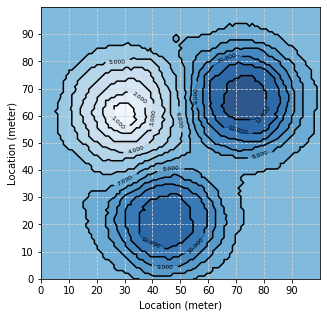

In [246]:
# 数据数目
n = 100
# 定义x, y
x = np.linspace(0, 100, n)
y = np.linspace(0, 100, n)

# 生成网格数据
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(figsize=(5,5))
plt.xlim((0,100)) #设置坐标轴范围
plt.ylim((0,100))
plt.xticks(np.arange(0,100,10))
plt.yticks(np.arange(0,100,10))
# 填充等高线的颜色, 8是等高线分为几部分
plt.contourf(X, Y, np.around(reward_map_1, -1)/40, 12, alpha = 0.85, cmap = plt.cm.Blues)
# 绘制等高线
plt.grid(ls='--',c='#D3D3D3')
C = plt.contour(X, Y, np.around(reward_map_1, -1)/40, 12, colors = 'black', linewidth = 0.01)
# 绘制等高线数据
plt.xlabel('Location (meter)', font)
plt.ylabel('Location (meter)', font)
plt.clabel(C, inline = True, fontsize = 6)
fig.savefig('plots/conf1.pdf',dpi=600,format='pdf')
plt.show()

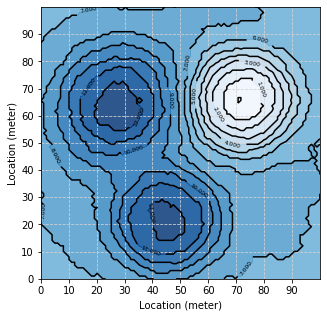

In [247]:
# 数据数目
n = 100
# 定义x, y
x = np.linspace(0, 100, n)
y = np.linspace(0, 100, n)

# 生成网格数据
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(figsize=(5,5))
plt.xlim((0,100)) #设置坐标轴范围
plt.ylim((0,100))
plt.xticks(np.arange(0,100,10))
plt.yticks(np.arange(0,100,10))
# 填充等高线的颜色, 8是等高线分为几部分
plt.contourf(X, Y, np.around(reward_map_2, -1)/40, 12, alpha = 0.85, cmap = plt.cm.Blues)
# 绘制等高线
plt.grid(ls='--',c='#D3D3D3')
C = plt.contour(X, Y, np.around(reward_map_2, -1)/40, 12, colors = 'black', linewidth = 0.01)
# 绘制等高线数据
plt.xlabel('Location (meter)', font)
plt.ylabel('Location (meter)', font)
plt.clabel(C, inline = True, fontsize = 6)
fig.savefig('plots/conf2.pdf',dpi=600,format='pdf')
plt.show()

In [242]:
xloc = np.ones(1050)
yloc = np.ones(1050)
count = 0
for x in range(100):
    for y in range(100):
        if env[x,y]!=0:
            xloc[count]=y
            yloc[count]=x
            count+=1
#             print(x,y)


No handles with labels found to put in legend.


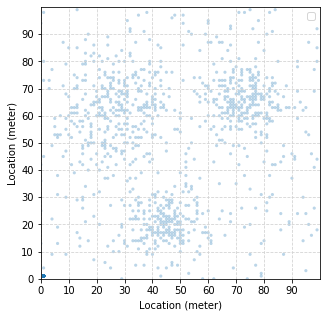

In [244]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.xlim((0,100)) #设置坐标轴范围
plt.ylim((0,100))
plt.xticks(np.arange(0,100,10))
plt.yticks(np.arange(0,100,10))
ax.grid(ls='--',c='#D3D3D3')

ax.scatter(xloc, yloc, s=10, alpha=0.3, edgecolors='none')

ax.legend()
plt.xlabel('Location (meter)', font)
plt.ylabel('Location (meter)', font)
fig.savefig('plots/conf_all_ms.pdf',dpi=600,format='pdf')
plt.show()